In [2]:
import pandas as pd
import os, glob
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import datetime as date
import dateutil
import random

random.seed(123123123)
folder = "DATA\Working"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one

def load_df():
    df_meta = []
    all_channel_names = []
    df_meta = pd.DataFrame(df_meta)
    for csv in all_CSVs: 
        filename = os.path.basename(csv)
        if filename[-13:] == "automated.csv":
            channelName = filename.replace(filename[-14:], "")
            df = pd.read_csv(csv)
            df["Channel"]= channelName
            index = [i for i in range(len(df))]
            df.set_index([index, 'Channel'], inplace= True)
            frames = [df_meta, df]
            df_meta = pd.concat(frames)
            if channelName not in all_channel_names:
                all_channel_names.append(channelName)
    return df_meta, all_channel_names
[df_meta, all_channel_names] = load_df()


#create unique colors
colors=[]
for c in all_channel_names:
    color = []
    for i in range(3):
        x = round(random.uniform(0, 1),2)
        color.append(x)
    colors.append(color)

Wahrheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Wahrheit verpflichtet"]
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
Alles = df_meta.loc[df_meta.index.get_level_values("Channel") == "ALLESUNDNICHTS"]
Drachentöter = df_meta.loc[df_meta.index.get_level_values("Channel") == "DRACHENTÖTER TV"]
Freiheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Weg in deine Freiheit"]
Rettung = df_meta.loc[df_meta.index.get_level_values("Channel") == 'Rettung der Menschheit TV']
UBC = df_meta.loc[df_meta.index.get_level_values("Channel") == 'UBC TV']
VeitClub = df_meta.loc[df_meta.index.get_level_values("Channel") == 'VEIT CLUB']

df_collection = [Wahrheit, Schöpfer, Alles, Drachentöter, Freiheit, Rettung, UBC, VeitClub]
df_collection = []
ch_names = df_meta.index.get_level_values(1).unique()
for i in ch_names:
    print(i)
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == i]
    df_collection.append(df)
    
print(len(df_collection))
    
    

print(Schöpfer.columns)
display(Schöpfer[['publish_date', 'id', 'title', 'description', 'keywords', 'length',
       'views', 'age_restricted', 'yt_caption_info', 'yt_caption_tracks',
       'vid_info']][0:2])


ALLESUNDNICHTS
bewusstundso
Creator Monkeys TV
Der verlorene Zwilling TV
Der Wahrheit verpflichtet
Der Weg in deine Freiheit
DRACHENTÖTER TV
guelty till 11.12.23
Honett
PLANET VEIT
Rettung der Menschheit TV
Schöpferwissen TV - Backup NEU (siehe Kanalinfo) 
Schöpferwissen TV UBC NOBODY KNOWS
Schöpferwissen TV UBC
Schöpferwissen TV
Schöpferwissen- Peek-TV
SON GOKU TV
u n endlich
UBC TV
VEIT CLUB
veritas lügensarg tv
WER HAT ANGST VORM SCHWARZEN MANN
WISSEN - NICHT VON DIESER WELT
___________k______ungefähr
24
Index(['publish_date', 'id', 'title', 'description', 'keywords', 'length',
       'views', 'age_restricted', 'yt_caption_info', 'yt_caption_tracks',
       'vid_info'],
      dtype='object')


,,publish_date,id,title,description,keywords,length,views,age_restricted,yt_caption_info,yt_caption_tracks,vid_info
,Channel,,,,,,,,,,,
0,Schöpferwissen TV,2022-03-14,kVbRq4eZxBw,Code Wort:Covid 19,Sind wir Teil eines MEGA Komplotts?!?!,[],1476,1170,False,"{'a.de': <Caption lang=""German (auto-generated...",{'responseContext': {'visitorData': 'CgtwZ2QyS...,0
1,Schöpferwissen TV,2022-02-07,VusckwKSW4Y,BRAKING NEWS!!! PART I : Schokierende Wahrheit...,Die neue Fernstudiumsreihe mit nie dagewesen D...,[],343,1360,False,{},{'responseContext': {'visitorData': 'CgswcU5Tb...,0


## Pie Chart


(4028, 11)


<ipython-input-38-2266200f3959>:13: UserWarning: The handle <matplotlib.patches.Wedge object at 0x000001B4E1D789A0> has a label of '___________k______ungefähr' which cannot be automatically added to the legend.
  ax1.legend(all_channel_names, bbox_to_anchor=(0.99,0.8), loc="upper left", borderaxespad=0)


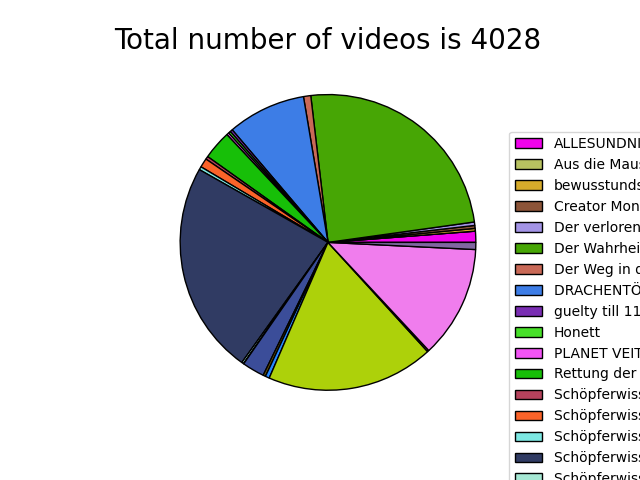

In [38]:
#toDO Legende lesbar machen
Title = "Total number of videos is "+ str(len(df_meta))               
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]))
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
print(df_meta.shape)
fi1, ax1 = plt.subplots(1, 1)
#fi1.tight_layout() #tight margins
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 8}, colors= colors)
ax1.legend(all_channel_names, bbox_to_anchor=(0.99,0.8), loc="upper left", borderaxespad=0)



## Duration

Videos on other channels with same length: 4990
Number of other Videos: 4028
['ALLESUNDNICHTS', 'Aus die Maus', 'bewusstundso', 'Creator Monkeys TV', 'Der verlorene Zwilling TV', 'Der Wahrheit verpflichtet', 'Der Weg in deine Freiheit', 'DRACHENTÖTER TV', 'guelty till 11.12.23', 'Honett', 'PLANET VEIT', 'Rettung der Menschheit TV', 'Schöpferwissen TV - Backup NEU (siehe Kanalinfo) ', 'Schöpferwissen TV UBC NOBODY KNOWS', 'Schöpferwissen TV UBC', 'Schöpferwissen TV', 'Schöpferwissen- Peek-TV', 'SON GOKU TV', 'u n endlich', 'UBC TV', 'VEIT CLUB', 'veritas lügensarg tv', 'WER HAT ANGST VORM SCHWARZEN MANN', 'WISSEN - NICHT VON DIESER WELT', '___________k______ungefähr']


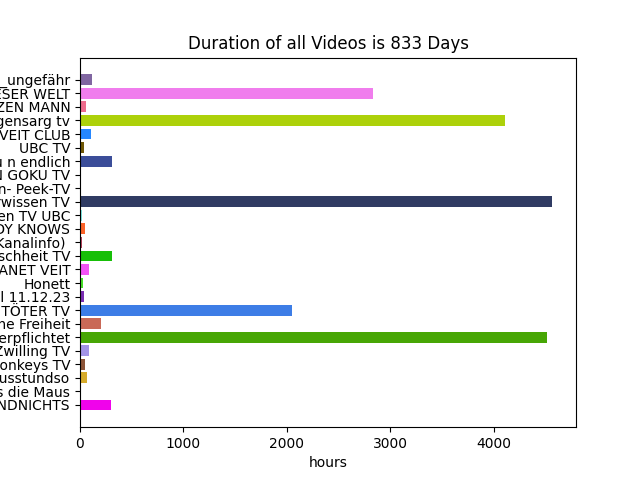

In [46]:
df_drop = df_meta
counter_len = 0
[df_meta, all_channel_names] = load_df()
for length in Wahrheit["length"]:
    for lengthS in df_drop["length"]:
        if length == lengthS:
            counter_len += 1
print("Videos on other channels with same length: %s" %counter_len)
print("Number of other Videos: %s" % df_drop.shape[0])

duration=0
list_of_length = []
print(all_channel_names)
#get duration
for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    secs = int(df["length"].sum(axis = 0, skipna = True))
    hours = secs/360
    days= hours/24
    list_of_length.append(hours)
    duration = duration + hours/24

plt.barh(all_channel_names, list_of_length, color = colors)
title = duration
plt.title("Duration of all Videos is %s Days" % round(title))
plt.xlabel("hours")
plt.ylabel("")
plt.show()
#print(list_of_length)
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()



## EventPlot

<ipython-input-5-9c7dc95d4b10>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_xticklabels(labels)


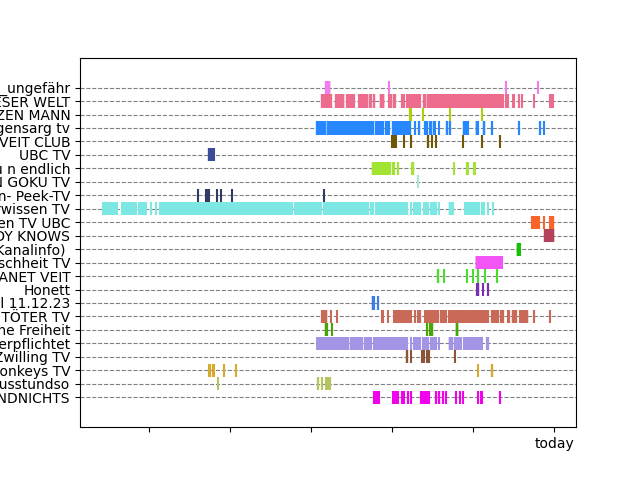

In [5]:
from datetime import datetime
[df, all_channels] = load_df()
list_of_date =[]
list_of_list = []
now = datetime.now()
for df in df_collection:
    for p_date in df["publish_date"]:
        p_date =p_date.replace(" 00:00:00", "")
        dt = datetime.strptime(p_date, '%Y-%m-%d')
        diff  = (now - dt)
        list_of_date.append(int(diff.days)*-1)
    list_of_list.append(list_of_date)
    list_of_date = []

D= list_of_list
# plot:
fig, axx = plt.subplots()
axx.eventplot(D, orientation="horizontal",  linelengths = 0.98, color = colors[:-1])
labels = [item.get_text() for item in axx.get_xticklabels()]
labels[0] = '2015-08-07'
labels[-2] = "today"
axx.yaxis.grid(color='gray', linestyle='dashed')
axx.set_xticklabels(labels)
axx.set_yticks(range(24))
axx.set_yticklabels(ch_names)
plt.show()

## Growth of video corpus

['ALLESUNDNICHTS', 'Aus die Maus', 'bewusstundso', 'Creator Monkeys TV', 'Der verlorene Zwilling TV', 'Der Wahrheit verpflichtet', 'Der Weg in deine Freiheit', 'DRACHENTÖTER TV', 'guelty till 11.12.23', 'Honett', 'PLANET VEIT', 'Rettung der Menschheit TV', 'Schöpferwissen TV - Backup NEU (siehe Kanalinfo) ', 'Schöpferwissen TV UBC NOBODY KNOWS', 'Schöpferwissen TV UBC', 'Schöpferwissen TV', 'Schöpferwissen- Peek-TV', 'SON GOKU TV', 'u n endlich', 'UBC TV', 'VEIT CLUB', 'veritas lügensarg tv', 'WER HAT ANGST VORM SCHWARZEN MANN', 'WISSEN - NICHT VON DIESER WELT', '___________k______ungefähr']
0
ALLESUNDNICHTS


<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["one"] = 1
<ipython-input-34-c5acb1bd2f3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["publish_date"].iloc[k] = date.replace("00:00:00", "")


1
Aus die Maus
2
bewusstundso
3
Creator Monkeys TV


<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["one"] = 1
<ipython-input-34-c5acb1bd2f3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["publish_date"].iloc[k] = date.replace("00:00:00", "")
<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

4
Der verlorene Zwilling TV
5
Der Wahrheit verpflichtet


<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["one"] = 1
<ipython-input-34-c5acb1bd2f3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["publish_date"].iloc[k] = date.replace("00:00:00", "")
<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

6
Der Weg in deine Freiheit


<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["one"] = 1
<ipython-input-34-c5acb1bd2f3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["publish_date"].iloc[k] = date.replace("00:00:00", "")


7
DRACHENTÖTER TV


<ipython-input-34-c5acb1bd2f3e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["one"] = 1
<ipython-input-34-c5acb1bd2f3e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["publish_date"].iloc[k] = date.replace("00:00:00", "")


7


ValueError: unconverted data remains:  

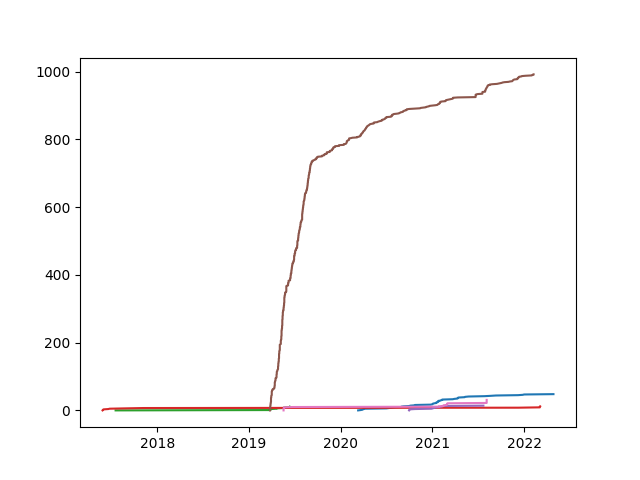

In [34]:


[df, all_channels] = load_df()             
fig, ax = plt.subplots()
print(all_channels)

for i, key in enumerate(all_channels):
    print(i)
    print(key)
    df_temp = df.loc[df_meta.index.get_level_values("Channel") == all_channels[i]]
    df_temp["one"] = 1
    #(df["one"].cumsum()) 
    
    for k, date in enumerate(df_temp["publish_date"]):
        df_temp["publish_date"].iloc[k] = date.replace(" 00:00:00", "")
    
    try: 
        x = [datetime.strptime(d, '%Y-%m-%d') for d in df_temp["publish_date"]]
    except: 
        print(i)
        x = [datetime.strptime(d, r'%Y-%m-%d') for d in df_temp["publish_date"]]
    ax.plot(x ,df_temp["one"].sum()-df_temp["one"].cumsum())


#labels = [item.get_text() for item in axx.get_xticklabels()]
#labels[1] = '2015-08-07'
#labels[-2] = "today"
#ax.set_xticklabels(labels)
#ax.legend(all_channels, bbox_to_anchor=(0., 1.0, 1., .10), loc=3,ncol=3, mode="expand", borderaxespad=0.)
#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))
plt.show()

